In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression

# Generate synthetic data
np.random.seed(0)
X = np.linspace(0, 10, 20)
y = 2 * X + 1 + np.random.normal(0, 2, size=X.shape)

# Fit linear regression


In [3]:
# Fit linear regression
X_reshaped = X.reshape(-1, 1)
model = LinearRegression()
model.fit(X_reshaped, y)
w = model.coef_[0]
b = model.intercept_
print("Fitted parameters: w =", w, ", b =", b)

Fitted parameters: w = 1.7725548289646023 , b = 3.2758950410682584


In [4]:
def cost_function(w, b, X, y):
    """Compute the cost function for linear regression."""
    predictions = w * X + b
    return np.mean((predictions - y) ** 2)
    pass

In [5]:
w_vals = np.linspace(w - 3, w + 3, 50)
b_vals = np.linspace(b - 3, b + 3, 50)
W, B = np.meshgrid(w_vals, b_vals)
J = np.zeros_like(W)

In [ ]:
# Calculate the cost function for each combination of w and b
# This is a vectorized operation for efficiency
for i in range(W.shape[0]):
    for j in range(W.shape[1]):
        J[i, j] = cost_function(W[i, j], B[i, j], X, y)


In [10]:
def plot_regression_line(X, y, w, b, ax=None, title=None):
    """
    Plot data points and a regression line defined by w and b.
    """
    if ax is None:
        fig, ax = plt.subplots(figsize=(8, 5))
    ax.scatter(X, y, color='blue', label='Data')
    x_line = np.linspace(X.min(), X.max(), 100)
    y_line = w * x_line + b
    ax.plot(x_line, y_line, color='red', linewidth=2, label=f'y = {w:.2f}x + {b:.2f}')
    ax.set_xlabel('X')
    ax.set_ylabel('y')
    ax.legend()
    if title:
        ax.set_title(title)
    plt.show()


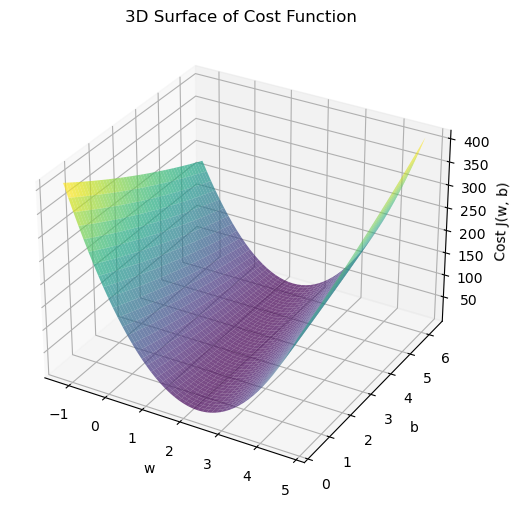

In [11]:
# 3D Surface plot
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(W, B, J, cmap='viridis', alpha=0.7)
ax.set_xlabel('w')
ax.set_ylabel('b')
ax.set_zlabel('Cost J(w, b)')
plt.title('3D Surface of Cost Function')
plt.show()


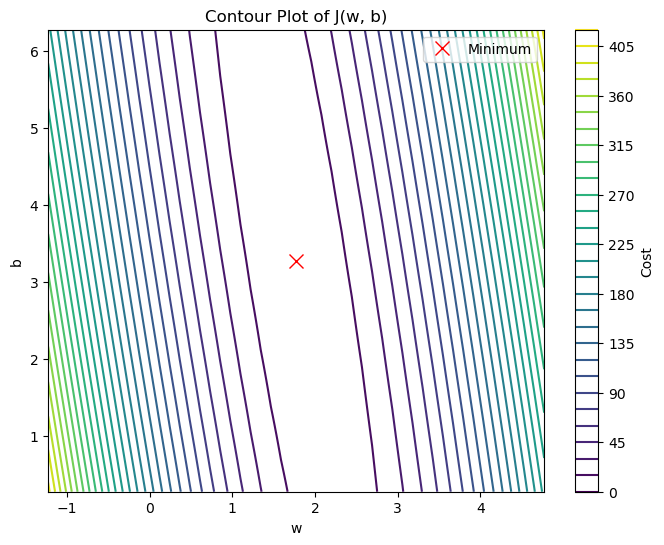

In [12]:
# Contour plot
plt.figure(figsize=(8, 6))
cp = plt.contour(W, B, J, levels=30, cmap='viridis')
plt.xlabel('w')
plt.ylabel('b')
plt.title('Contour Plot of J(w, b)')
plt.plot(w, b, 'rx', markersize=10, label='Minimum')
plt.legend()
plt.colorbar(cp, label='Cost')
plt.show()

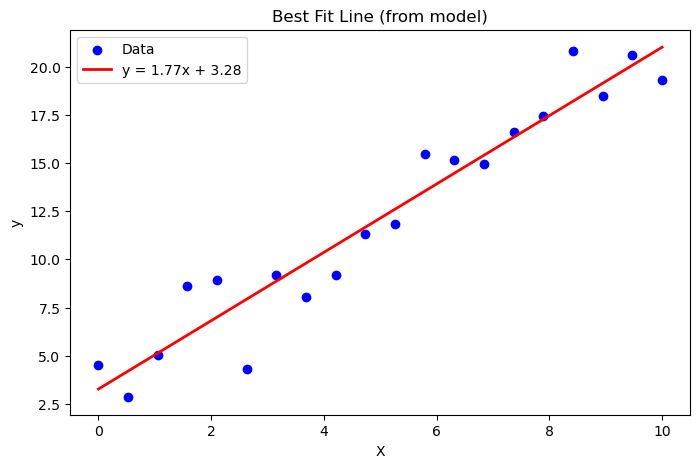

In [13]:
plot_regression_line(X, y, w, b, title="Best Fit Line (from model)")



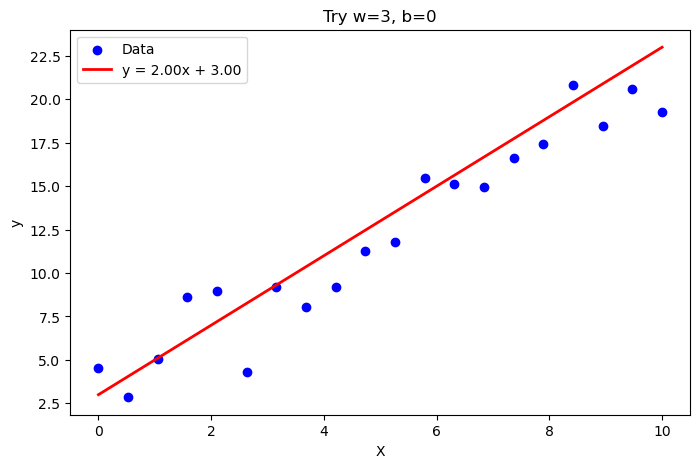

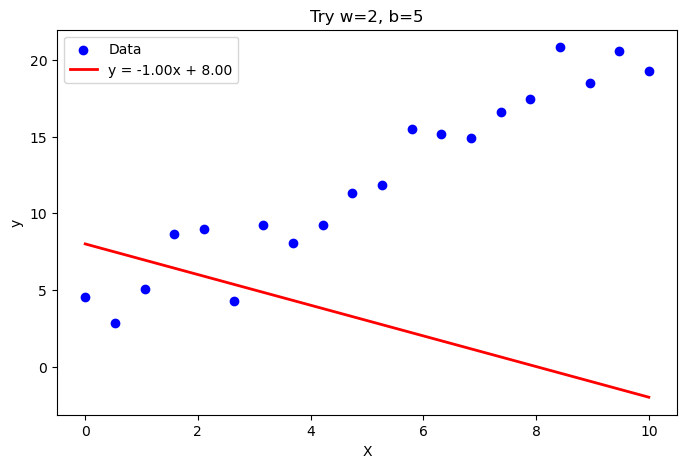

In [17]:
plot_regression_line(X, y, 2, 3, title="Try w=3, b=0")
plot_regression_line(X, y, -1, 8, title="Try w=2, b=5")



In [18]:
def plot_regression_line_and_cost(X, y, w, b, ax=None, title=None):
    """
    Plot data, regression line for given w, b, and show cost on the plot.
    """
    # Mean Squared Error cost function (you can swap this for your J(w, b) formula!)
    def cost_function(w, b, X, y):
        y_pred = w * X + b
        return np.mean((y_pred - y) ** 2) / 2

    cost = cost_function(w, b, X, y)
    if ax is None:
        fig, ax = plt.subplots(figsize=(8, 5))
    ax.scatter(X, y, color='blue', label='Data')
    x_line = np.linspace(X.min(), X.max(), 100)
    y_line = w * x_line + b
    ax.plot(x_line, y_line, color='red', linewidth=2, label=f'y = {w:.2f}x + {b:.2f}')
    ax.set_xlabel('X')
    ax.set_ylabel('y')
    ax.legend()
    if title:
        ax.set_title(f"{title}\nCost (J) = {cost:.2f}")
    else:
        ax.set_title(f"w={w:.2f}, b={b:.2f}, Cost (J) = {cost:.2f}")
    plt.show()


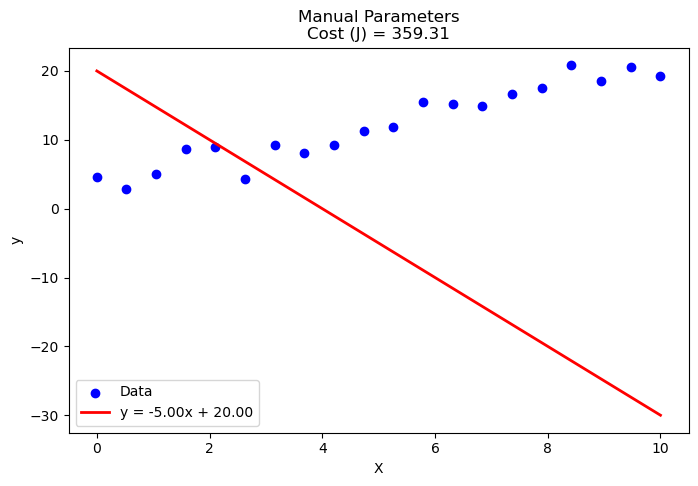

In [21]:
plot_regression_line_and_cost(X, y, -5, 20, title="Manual Parameters")